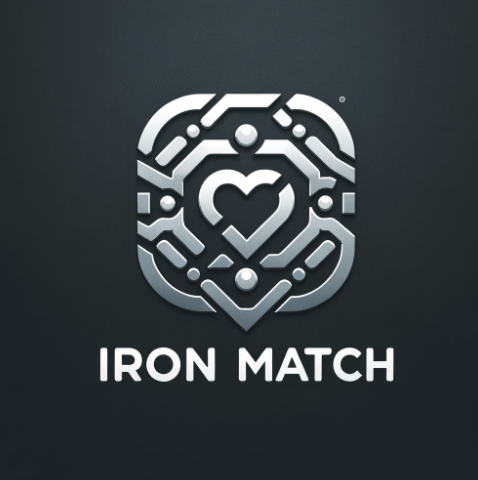

# Business Case Challenge: Iron Match

<!-- In front of you is an exciting data challenge with Iron Match, the ultimate dating app designed to create strong and lasting connections. Today, you'll be diving into real data from Iron Match, applying your data scientist skills to solve a business problem. This is a fantastic opportunity to showcase your ability to implement a complete machine learning system from start to finish.

## Challenge Overview

We encourage you to use the latest version of Python and its associated libraries for this challenge. However, any recent version is accepted, so use what you are most comfortable with. The sections provided in this notebook are here to guide you through the expected steps, but don't feel constrained by them. Feel free to add new sections or skip those you deem unnecessary.

## Timeframe

We expect you to complete this assignment in about 3 hours. This is not a strict deadline; the goal is not to develop the best machine learning model ever but to see how you approach and implement the steps of a machine learning system.

Good luck, and have fun! We can't wait to see your innovative solutions and how you bring data to life with Iron Match. -->

## Problem

We have got a dataset of Iron Match users, and our goal is to **build a simple machine learning system to predict whether a user will like each other**.

The dataset can be found in the same repo in the "data" folder.

The idea is to build a model for each user and use it to evaluate whether another user will like him or her. In this exercise, we provide a dataset of the users who rated Paula, a 23 year old teacher from London.

For the users who rated Paula, we have the next features:
* Name
* Date of birth
* Date of registration
* Job
* Height
* Popularity (an Iron Match metric between 0 and 4 on how much the user has been liked in Iron Match)

The response feature is the *liked* column. This indicates whether the user liked Paula (1) or not (0). This is the value we want to predict for new users.

In [1]:
# ensure reproducibility.
RANDOM_SEED = 42

## Load the dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd. read_csv('data/paula_ratings.csv')

## Exploratory analysis

Use this section to familiarize yourself with the dataset, and analyze any information to require to later build the model.

In [3]:
dataset.head()

,name,date_of_birth,date_of_registration,job,height,profile_popularity,liked
0,Colton,1991-09-15,2017-09-16,author,179,0,1
1,Shaun,1993-01-11,2016-03-10,NaN,166,0,1
2,Emanuel,1995-01-04,2017-10-09,NaN,175,1,1
3,Demetrius,1992-06-06,2016-07-09,NaN,173,3,0
4,Dominick,1993-04-28,2017-03-10,air steward,177,4,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   name                  100001 non-null  object
 1   date_of_birth         100001 non-null  object
 2   date_of_registration  100001 non-null  object
 3   job                   50587 non-null   object
 4   height                100001 non-null  int64 
 5   profile_popularity    100001 non-null  int64 
 6   liked                 100001 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [5]:
dataset.describe()

,height,profile_popularity,liked
count,100001.000000,100001.000000,100001.000000
mean,176.765782,2.048510,0.785892
std,7.400907,1.629342,0.410204
min,0.000000,0.000000,0.000000
25%,172.000000,0.000000,1.000000
50%,177.000000,2.000000,1.000000
75%,182.000000,4.000000,1.000000
max,211.000000,4.000000,1.000000


In [6]:
dataset.columns

Index(['name', 'date_of_birth', 'date_of_registration', 'job', 'height',
       'profile_popularity', 'liked'],
      dtype='object')

### Categorical variables 

Let's have a quick look at the categorical variables.

#### Profile popularity

In [7]:
dataset['profile_popularity'].unique()

array([0, 1, 3, 4, 2], dtype=int64)

Text(0.5, 1.0, "Paula's popularity")

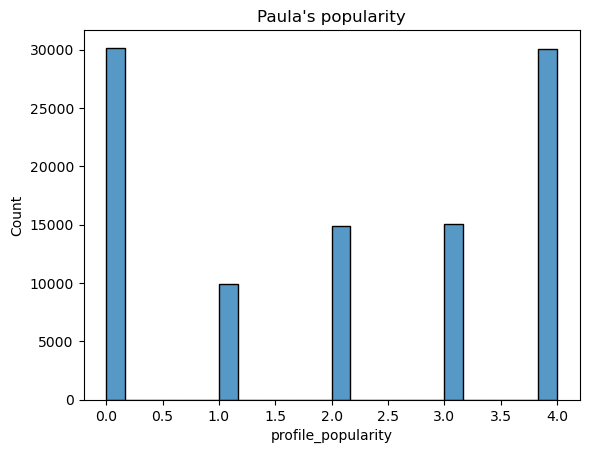

In [8]:
sns.histplot(dataset['profile_popularity'])
plt.title("Paula's popularity")

#### Job

In [9]:
dataset['job'].nunique()
dataset['job'].unique()

array(['author', nan, 'air steward', 'farmer', 'accountant', 'jeweler',
       'vet', 'doctor', 'sailor', 'shop assistant', 'TV cameraman',
       'nurse', 'cook', 'actor', 'career counselor', 'porter',
       'computer programmer', 'lawyer', 'salesperson', 'printer',
       'lecturer', 'travel agent', 'painter', 'professional gambler',
       'dentist', 'TV presenter', 'chef', 'photographer', 'head teacher',
       'makeup artist', 'scientist', 'company director', 'politician',
       'fishmonger', 'film director', 'tailor',
       'sign language Interpreter', 'receptionist', 'animator', 'manager',
       'puppeteer', 'butcher', 'economist', 'geologist', 'fisherman',
       'clerk', 'executive', 'journalist', 'teacher', 'surgeon',
       'decorator', 'juggler', 'electrician', 'singer', 'telephonist',
       'web designer', 'magician', 'engineer', 'garbage man', 'judge',
       'library assistant', 'assistant', 'solicitor', 'director',
       'lexicographer', 'pilot', 'musician', 'dipl

Text(0.5, 1.0, 'Top 10 Jobs')

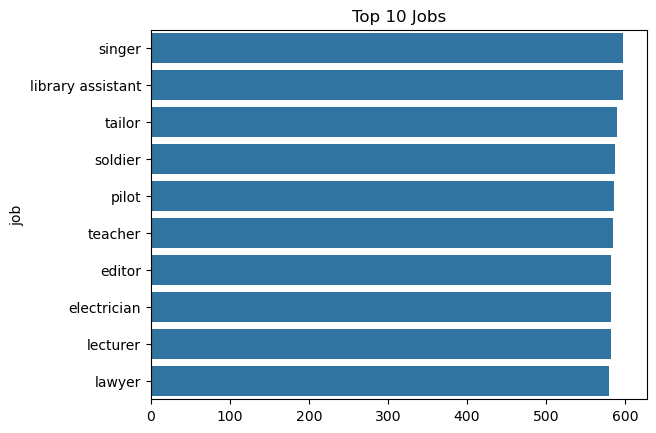

In [10]:
top_ten_jobs = dataset['job'].value_counts().head(10)
top_ten_jobs

sns.barplot(x=top_ten_jobs.values, y=top_ten_jobs.index)
plt.title("Top 10 Jobs")

### Nominal variables

#### Height

In [11]:
dataset['height'].unique()

array([179, 166, 175, 173, 177, 182, 164, 176, 171, 165, 190, 188, 174,
       172, 178, 185, 169, 170, 186, 193, 183, 184, 194, 168, 181, 180,
       161, 187, 189, 167, 195, 162, 199, 192, 163, 159, 158, 191, 151,
       160, 196, 157, 156, 197, 152, 198, 154, 205, 155, 203, 153, 149,
       200, 201, 204, 202, 207, 206, 150, 148, 211, 147, 142, 146,   0],
      dtype=int64)

In [12]:
print("Max height:", dataset['height'].max())
print("Min height:",dataset['height'].min())
print("Mean height:",dataset['height'].mean())

Max height: 211
Min height: 0
Mean height: 176.76578234217658


<Axes: xlabel='height', ylabel='Count'>

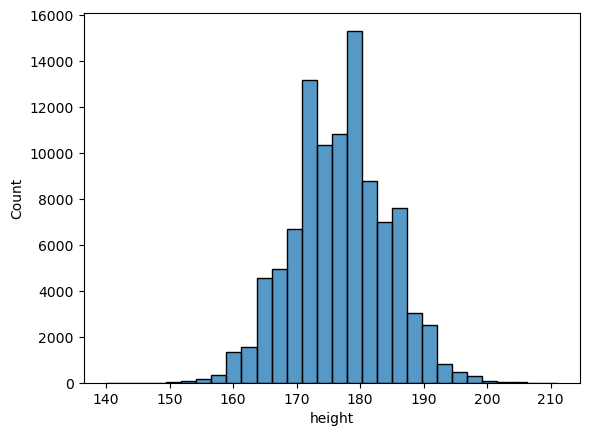

In [13]:
sns.histplot(dataset['height'].clip(lower=140, upper=250), bins=30)

### Date variables

#### Date of birth

In [14]:
from datetime import datetime

# From date of birth, just keep the year
dataset['birth_year'] = pd.to_datetime(dataset['date_of_birth']).dt.year

In [15]:
# Convert birth_year into age
current_year = datetime.now().year
dataset['age'] = current_year -  dataset['birth_year']

<Axes: xlabel='age', ylabel='Count'>

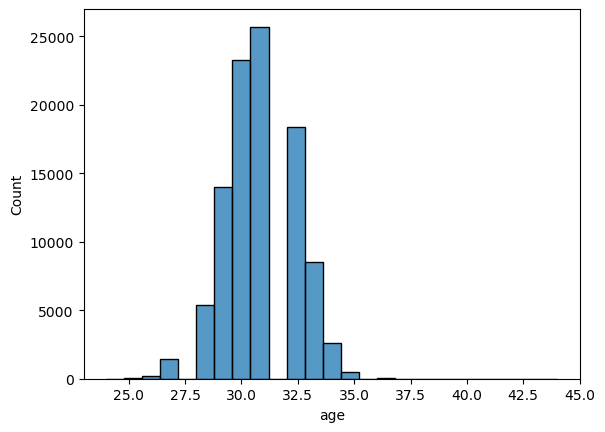

In [16]:
sns.histplot(dataset['age'], bins=25)

#### Date of registration


In [17]:
# Convert 'date_of_registration' to 'days_since_registration'
dataset['days_since_registration'] = pd.to_datetime(dataset['date_of_registration']).apply(
    lambda x: (datetime.now() - x).days
)

## Data wrangling

If the dataset is not clean, use this section to fix it.

In [18]:
# Check for missing values in the dataset
missing_values = dataset.isnull().sum()

# Display the count of missing values for each column
missing_values

name                           0
date_of_birth                  0
date_of_registration           0
job                        49414
height                         0
profile_popularity             0
liked                          0
birth_year                     0
age                            0
days_since_registration        0
dtype: int64

In [19]:
# Handle missing values in the 'job' column by replacing them with 'Unknown'
dataset['job'].fillna('Unknown', inplace=True)

C:\Users\crvid\AppData\Local\Temp\ipykernel_16900\2028312526.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['job'].fillna('Unknown', inplace=True)


In [20]:
# Check if the missing values were correctly filled
missing_values = dataset.isnull().sum()
missing_values

name                       0
date_of_birth              0
date_of_registration       0
job                        0
height                     0
profile_popularity         0
liked                      0
birth_year                 0
age                        0
days_since_registration    0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode the job column into numerical format.
dataset['job_encoded'] = label_encoder.fit_transform(dataset['job'])
dataset

,name,date_of_birth,date_of_registration,job,height,profile_popularity,liked,birth_year,age,days_since_registration,job_encoded
0,Colton,1991-09-15,2017-09-16,author,179,0,1,1991,33,2650,9
1,Shaun,1993-01-11,2016-03-10,Unknown,166,0,1,1993,31,3205,2
2,Emanuel,1995-01-04,2017-10-09,Unknown,175,1,1,1995,29,2627,2
3,Demetrius,1992-06-06,2016-07-09,Unknown,173,3,0,1992,32,3084,2
4,Dominick,1993-04-28,2017-03-10,air steward,177,4,1,1993,31,2840,5
...,...,...,...,...,...,...,...,...,...,...,...
99996,Taylor,1994-07-15,2016-12-28,writer,188,3,1,1994,30,2912,91
99997,Jamal,1994-12-05,2017-03-16,Unknown,188,3,1,1994,30,2834,2
99998,Layne,1996-06-27,2017-07-30,Unknown,184,4,1,1996,28,2698,2
99999,Magnus,1995-05-11,2016-12-01,Unknown,168,3,0,1995,29,2939,2


In [22]:
# Drop unnecessary columns
dataset_cleaned = dataset.drop(columns=['name', 'date_of_birth', 'date_of_registration', 'job', 'birth_year'])
dataset_cleaned

,height,profile_popularity,liked,age,days_since_registration,job_encoded
0,179,0,1,33,2650,9
1,166,0,1,31,3205,2
2,175,1,1,29,2627,2
3,173,3,0,32,3084,2
4,177,4,1,31,2840,5
...,...,...,...,...,...,...
99996,188,3,1,30,2912,91
99997,188,3,1,30,2834,2
99998,184,4,1,28,2698,2
99999,168,3,0,29,2939,2


# Split

Split the dataset into train and test, before feature extraction to avoid any data leakage!

We split the dataset in a stratified fashion in order to preserve label distribution accross subsets. 

In [23]:
from sklearn.preprocessing import StandardScaler

# Select numerical features to standardize
numerical_features = ['height', 'profile_popularity', 'age', 'days_since_registration', 'job_encoded']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical features
dataset_cleaned[numerical_features] = scaler.fit_transform(dataset_cleaned[numerical_features])


In [24]:
dataset_cleaned

,height,profile_popularity,liked,age,days_since_registration,job_encoded
0,0.301886,-1.257268,1,1.498532,-0.893786,-0.529574
1,-1.454664,-1.257268,1,0.190608,0.950573,-0.771634
2,-0.238591,-0.643520,1,-1.117315,-0.970219,-0.771634
3,-0.508830,0.583975,0,0.844570,0.548470,-0.771634
4,0.031647,1.197723,1,0.190608,-0.262384,-0.667894
...,...,...,...,...,...,...
99996,1.517959,0.583975,1,-0.463354,-0.023116,2.305979
99997,1.517959,0.583975,1,-0.463354,-0.282323,-0.771634
99998,0.977482,1.197723,1,-1.771277,-0.734274,-0.771634
99999,-1.184426,0.583975,0,-1.117315,0.066610,-0.771634


In [25]:
from sklearn.model_selection import train_test_split

X = dataset_cleaned.drop(columns=['liked'])
y = dataset_cleaned['liked']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 5), (20001, 5), (80000,), (20001,))

## Feature extraction

Use this section to extract any new feature that you consider it can be relevant.

We propose the following feature extraction:

- ***registration_season***: extract the season of registration from date_of_registration. People who register during summer may behave in a different manner than people who do it in winter. We use seasons instead of months to reduce the cardinality (curse of dimensionality).
- ***years_from_registration***: simplify the variable date_of_registration by using only the year and normalizing by 2021.
- ***years_from_paula***: simplify the variable date_of_birth by computing the age difference between each user and Paula.
- ***profile_popularity***: this variable is useful as is.
- ***height***: simple preprocessing, convert cm to m in order to use a similar scale for all the features.
- ***job_is_nan***: convert to int variable, 1 if job is NaN, 0 otherwise.
- ***job***: this is by far the more complex variable, it seems to be useful while having a high cardinality. We prefer to avoid one-hot encoding for this feature, instead we use target encoding. Considering also that the main drawback of target encoding; it biases the model to overtrust the encoded target feature and makes it prone to overfitting. If we had more time, we would implement a better solution, one-hot encoding + dimensionality reduction, we think that LDA in particular may be useful here.

Moreover, we would ommit the "name" feature extraction, since we do not have time to do so. We think it may be useful, specially for infering the gender, but it is out of our scope.

In [26]:
# Define a function to get the registration season
def get_season(date_str):
    month = pd.to_datetime(date_str).month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
    
# Apply the function to create a new 'registration_season' feature
dataset_cleaned['registration_season'] = dataset['date_of_registration'].apply(get_season)

In [27]:
# Encode the 'registration_season' column
dataset_cleaned['registration_season_encoded'] = label_encoder.fit_transform(dataset_cleaned['registration_season'])

# Drop the categorical column 
dataset_cleaned = dataset_cleaned.drop(columns=['registration_season'])

In [28]:
# Standardize the numerical column
dataset_cleaned['registration_season_encoded'] = scaler.fit_transform(dataset_cleaned[['registration_season_encoded']])

In [29]:
# Change column names for a better management of the data
dataset_cleaned.rename(columns={'job_encoded': 'job'}, inplace=True)
dataset_cleaned.rename(columns={'registration_season_encoded': 'registration_season'}, inplace=True)

In [30]:
dataset_cleaned

,height,profile_popularity,liked,age,days_since_registration,job,registration_season
0,0.301886,-1.257268,1,1.498532,-0.893786,-0.529574,-1.312201
1,-1.454664,-1.257268,1,0.190608,0.950573,-0.771634,-0.367829
2,-0.238591,-0.643520,1,-1.117315,-0.970219,-0.771634,-1.312201
3,-0.508830,0.583975,0,0.844570,0.548470,-0.771634,0.576543
4,0.031647,1.197723,1,0.190608,-0.262384,-0.667894,-0.367829
...,...,...,...,...,...,...,...
99996,1.517959,0.583975,1,-0.463354,-0.023116,2.305979,1.520914
99997,1.517959,0.583975,1,-0.463354,-0.282323,-0.771634,-0.367829
99998,0.977482,1.197723,1,-1.771277,-0.734274,-0.771634,0.576543
99999,-1.184426,0.583975,0,-1.117315,0.066610,-0.771634,1.520914


### Check duplicates

In [31]:
dataset_cleaned.isnull().sum()

height                     0
profile_popularity         0
liked                      0
age                        0
days_since_registration    0
job                        0
registration_season        0
dtype: int64

In [32]:
dataset_cleaned.duplicated().sum()

2716

In [33]:
duplicate_rows = dataset_cleaned[dataset_cleaned.duplicated()]
print(duplicate_rows)

         height  profile_popularity  liked       age  days_since_registration  \
1146   0.031647           -1.257268      1 -0.463354                -0.890463   
4770   0.572124           -1.257268      1 -0.463354                -0.362079   
4841  -0.238591           -1.257268      1  0.844570                 1.944201   
6076   0.301886           -1.257268      1  0.190608                -0.973542   
6447  -0.238591           -1.257268      1 -0.463354                -0.910402   
...         ...                 ...    ...       ...                      ...   
99930 -0.779068           -1.257268      1 -1.117315                 0.156336   
99937  0.301886            0.583975      1 -0.463354                -0.129457   
99964  0.166767            1.197723      1  0.190608                -0.667811   
99978 -0.103472            1.197723      1  0.844570                -0.877170   
99997  1.517959            0.583975      1 -0.463354                -0.282323   

            job  registrati

In [34]:
# Remove duplicates in place
dataset_cleaned = dataset_cleaned.drop_duplicates()

## Feature selection

If you consider that a feature is not relevant and that the model will be better without it, do it in this section.

We've already drop the variable name. We still want to analyze the correlation between the features in order to detect multicolinearity.

In [35]:
# Correlation matrix for multicollinearity analysis
correlation_matrix = dataset_cleaned.corr()

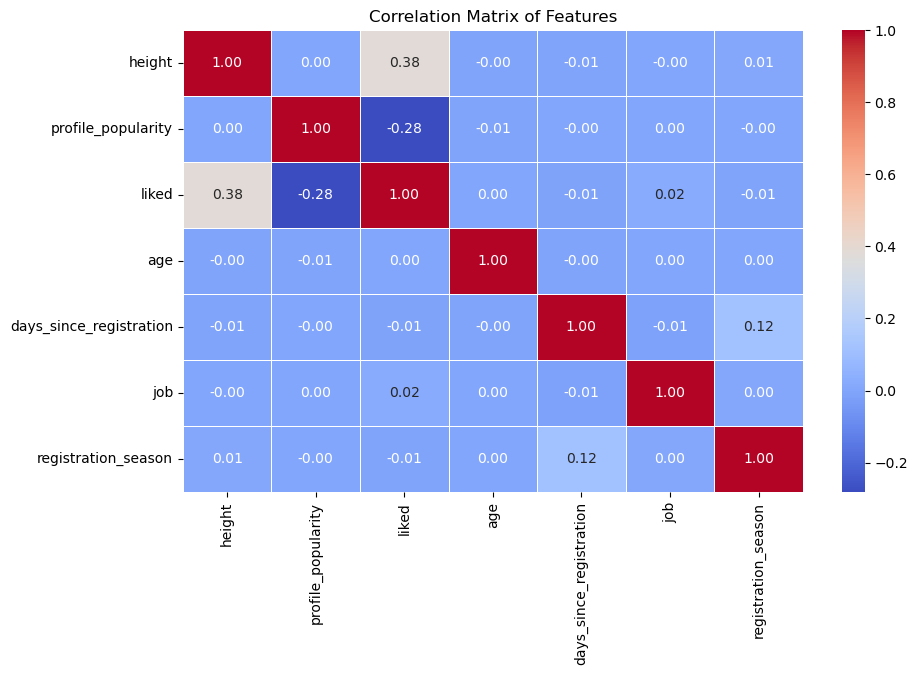

In [36]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

## Model definition (linear model)

Create a machine learning model instance in this section. The model needs to be a linear model. You can import it from sklearn or any other library of your choice.

In [37]:
from sklearn.linear_model import LogisticRegression

# Initialize a linear model (Logistic Regression)
linear_model = LogisticRegression(random_state=42, max_iter=1000)

print(linear_model)

LogisticRegression(max_iter=1000, random_state=42)


In [38]:
# Train the model on the training data
linear_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [39]:
# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

## Model definition (based on decision trees)

Create a machine learning model instance in this section. The model needs to be based on decision trees (it can be an ensemble). You can import it from sklearn or any other library of your choice.

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a model based on decision trees (Random Forest Classifier)
decision_tree_model = RandomForestClassifier(random_state=42, n_estimators=100)

print(decision_tree_model)

RandomForestClassifier(random_state=42)


In [41]:
# Train the model on the training data
decision_tree_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# Make predictions on the test set
y_pred_tree = decision_tree_model.predict(X_test)

## Evaluation of the models

Evaluate how well your model is performing in this section.

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

### Logistic Regression

In [44]:
# Evaluate Logistic Regression
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_linear))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_linear))
print(f"ROC-AUC: {roc_auc_score(y_test, linear_model.predict_proba(X_test)[:, 1]):.4f}")

Logistic Regression Evaluation:
Accuracy: 0.8390
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.41      0.53      4306
           1       0.86      0.96      0.90     15695

    accuracy                           0.84     20001
   macro avg       0.79      0.68      0.71     20001
weighted avg       0.83      0.84      0.82     20001

Confusion Matrix:
[[ 1784  2522]
 [  699 14996]]
ROC-AUC: 0.8319


### Random Forest

In [45]:
# Evaluate Random Forest
print("Random Forest Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print(f"ROC-AUC: {roc_auc_score(y_test, decision_tree_model.predict_proba(X_test)[:, 1]):.4f}")

Random Forest Evaluation:
Accuracy: 0.8942
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      4306
           1       0.93      0.94      0.93     15695

    accuracy                           0.89     20001
   macro avg       0.85      0.83      0.84     20001
weighted avg       0.89      0.89      0.89     20001

Confusion Matrix:
[[ 3130  1176]
 [  940 14755]]
ROC-AUC: 0.8604


### Comparison

Random Forest model shows a higher performance across most metrics. Is better at reducing false positives and much better at identifying users who didn't like Paula. Displays a better balance between liked or not liked, making it more robust for predicting.

## Your best model in production

In this section we want to see how your model performs with two users that just joined Iron Match. We are planning to show Paula to them, but we want to know in advance if they will like her or not.

Please report whether your model thinks that each of these users will like her.

In [46]:
import numpy as np

# Example two new users data
new_users = pd.DataFrame({'height': [170, 185], 
                          'profile_popularity': [3, 4], 
                          'age': [26, 32],
                          'days_since_registration': [1, 1],
                          'job': ['author', 'teacher'],
                          'registration_season': ['Summer', 'Winter'],
                          })

new_users

,height,profile_popularity,age,days_since_registration,job,registration_season
0,170,3,26,1,author,Summer
1,185,4,32,1,teacher,Winter


In [47]:
# Update the LabelEncoder with new classes
label_encoder.classes_ = np.append(label_encoder.classes_, ['author', 'teacher'])

# Transform the 'job' column for new users
new_users['job_encoded'] = label_encoder.transform(new_users['job'])
new_users['registration_season_encoded'] = label_encoder.transform(new_users['registration_season'])

In [50]:
new_users

,height,profile_popularity,age,days_since_registration,job,registration_season,job_encoded,registration_season_encoded
0,170,3,26,1,author,Summer,4,2
1,185,4,32,1,teacher,Winter,5,3


In [51]:
new_users.drop(columns=['job', 'registration_season'])

,height,profile_popularity,age,days_since_registration,job_encoded,registration_season_encoded
0,170,3,26,1,4,2
1,185,4,32,1,5,3


In [54]:
# Predict using the Random Forest model
predictions = decision_tree_model.predict(new_users)

# Display predictions
for i, prediction in enumerate(predictions, start=1):
    result = "like Paula" if prediction == 1 else "not like Paula"
    print(f"User {i}: Model predicts they will {result}.")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- job
- registration_season
- registration_season_encoded


## Your conclusion

Write a **short** essay describing your decisions, the assumptions, how good the model is, and any other relevant information you consider.

I developed a machine learning pipeline to predict whether users would like Paula, a profile on the Iron Match dating app.

The data cleaning process included:
- Handling missing values in the job column, that were replaced with "Unknown."
- Categorical dates were transformed into numerical features, such as age and days_since_registration.
- Also jobs were encoded numerically and a new feature (registration_season) was added to make the model perform better.7
- Unnecesary categorical columns such as 'name' were dropped.
- All the numerical columns were standardized.

Model selection, trainining and evaluation.
- Linear Model (Logistic Regression) and tree-based model (Random Forest) were trained and evaluated, and the second one was the best-performing model across most metrics.

Model Performance:
The Random Forest model achieved:
- Accuracy: 89.42%
- Precision and Recall: Balanced performance across both classes.
- ROC-AUC: 0.8604, indicating strong class separation.